<a href="https://colab.research.google.com/github/ignaciomorenobarria21-a11y/Machine_Learning/blob/main/Copia_de_Sesion_01_Introduccion_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Fundamentos de Machine Learning

## Sesión 1: Introducción

**Máster en Formación Permanente en Inteligencia Artificial para el Sector Financiero**  
Universidad Internacional de Valencia · Edición Octubre 2025/26

---

📅 **Fecha:** 7 de enero de 2026  
⏱️ **Duración:** ~100 minutos  
👨‍🏫 **Profesor:** Jaume Antolí Plaza

## 1. Bienvenida y Contexto

### ¿Qué aprenderás en esta asignatura?

Esta asignatura te proporcionará las bases para **aplicar Machine Learning en el sector financiero**. Al finalizarla serás capaz de:

- Comprender qué es el Machine Learning y cuándo aplicarlo
- Preparar datos financieros para alimentar modelos
- Entrenar, validar y comparar diferentes algoritmos
- Evitar errores comunes como el sobreajuste
- Tomar decisiones informadas sobre qué modelo usar y por qué

### Metodología

Todo el material de la asignatura se concentra en **notebooks de Google Colab** como este. Cada sesión combina:

| Elemento | Descripción |
|----------|-------------|
| 📝 Celdas de texto | Explicaciones teóricas, ilustraciones y conceptos clave |
| 💻 Celdas de código | Ejemplos prácticos que ejecutarás paso a paso |

No necesitas instalar nada en tu ordenador: todo se ejecuta en la nube.

### Evaluación

| Actividad | Peso | Fecha entrega | Descripción |
|-----------|------|---------------|-------------|
| Test | 10% | 25/01/2026 | Cuestionario tipo test sobre contenidos de las sesiones 1-4 |
| Ejercicio práctico 1 | 30% | 08/02/2026 | Random Forest en Google Colab: cargar dataset, reducir multicolinealidad, seleccionar variables, definir train/test y entrenar modelo |
| Ejercicio práctico 2 | 60% | 22/02/2026 | XGBoost o SVM en Google Colab: similar al anterior añadiendo optimización de hiperparámetros con GridSearchCV |

⚠️ **Importante:** Las entregas fuera de plazo no se tendrán en cuenta para evaluación.

### Roadmap de la Asignatura

Las 13 sesiones siguen una progresión lógica:

```
FUNDAMENTOS                      TÉCNICAS                         APLICACIÓN
───────────────────────────────────────────────────────────────────────────────►

┌─────────────┐  ┌─────────────┐  ┌─────────────┐  ┌─────────────┐  ┌─────────────┐
│ Sesión 1    │  │ Sesión 2-4  │  │ Sesión 5-7  │  │ Sesión 8-10 │  │ Sesión 11-13│
│             │  │             │  │             │  │             │  │             │
│ Introducción│─►│ Clustering  │─►│ Árboles y   │─►│ Validación  │─►│ Modelos     │
│ + Dataset   │  │ Regresión   │  │ Ensamblado  │  │ y Optim.    │  │ Avanzados   │
│             │  │ Clasificac. │  │ Features    │  │             │  │             │
└─────────────┘  └─────────────┘  └─────────────┘  └─────────────┘  └─────────────┘
```

| # | Fecha | Tema | Contenido principal |
|---|-------|------|---------------------|
| 1 | 7 ene | Introducción | Conceptos de ML, crear dataset con indicadores |
| 2 | 8 ene | Clustering | K-Means, métricas de clustering |
| 3 | 15 ene | Regresión | Regresión lineal, MSE, MAE, R² |
| 4 | 20 ene | Clasificación | Regresión logística, accuracy, precision, recall |
| 5 | 23 ene | Árboles de decisión | Decision Tree, visualización |
| 6 | 27 ene | Ensamblado | Random Forest, feature importance |
| 7 | 29 ene | Selección de variables | Feature selection, multicolinealidad |
| 8 | 3 feb | Partición IS/OOS | Train/test temporal, partición invertida |
| 9 | 5 feb | Sobreoptimización | Overfitting, sesgo-varianza, validación cruzada |
| 10 | 10 feb | Optimización | GridSearchCV, regularización |
| 11 | 12 feb | XGBoost | Modelo avanzado con validación completa |
| 12 | 18 feb | SVM | Modelo avanzado con validación completa |
| 13 | 19 feb | Recapitulación | Comparativa, lecciones aprendidas |

### Configuración Inicial

Ejecuta la siguiente celda para preparar el entorno. Esto carga las librerías que usaremos a lo largo de la sesión.

In [ ]:
# ============================================================
# CONFIGURACIÓN INICIAL
# Ejecuta esta celda antes de continuar (Shift + Enter)
# ============================================================

# Librerías básicas para manejo de datos
import pandas as pd    # Para trabajar con tablas de datos
import numpy as np     # Para cálculos numéricos

# Librería para gráficos
import matplotlib.pyplot as plt

# Librería para warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')  # Estilo limpio para gráficos
pd.set_option('display.max_columns', 20) # Mostrar más columnas

print("✅ Entorno configurado correctamente")

✅ Entorno configurado correctamente


---

## 2. ¿Qué es Machine Learning?

### La idea central

En la **programación tradicional**, el programador escribe reglas explícitas que transforman los datos de entrada en una salida:

```
┌─────────────┐      ┌─────────────┐      ┌─────────────┐
│   DATOS     │  +   │   REGLAS    │  →   │  RESULTADO  │
│  (inputs)   │      │ (programa)  │      │  (output)   │
└─────────────┘      └─────────────┘      └─────────────┘

Ejemplo: Si precio > media_20_días AND volumen > media_volumen → COMPRAR
```

En **Machine Learning**, el enfoque se invierte. Le damos al algoritmo datos de entrada junto con los resultados esperados, y el algoritmo **descubre las reglas** por sí mismo:

```
┌─────────────┐      ┌─────────────┐      ┌─────────────┐
│   DATOS     │  +   │ RESULTADOS  │  →   │   REGLAS    │
│  (inputs)   │      │ (esperados) │      │  (modelo)   │
└─────────────┘      └─────────────┘      └─────────────┘

Ejemplo: Aquí tienes 10 años de datos y cuándo subió/bajó → encuentra tú el patrón
```

### ¿Por qué es útil?

Machine Learning es especialmente valioso cuando:

- Las reglas son **demasiado complejas** para escribirlas a mano (reconocimiento de imágenes, lenguaje natural)
- Las reglas **cambian con el tiempo** y necesitan adaptarse (patrones de fraude, comportamiento de mercados)
- No sabemos cuáles son las reglas, pero **tenemos muchos ejemplos** de entradas y salidas correctas

### Ejemplos en el sector financiero

| Aplicación | Entrada (datos) | Salida (predicción) |
|------------|-----------------|---------------------|
| **Scoring crediticio** | Historial financiero, ingresos, deudas | Probabilidad de impago |
| **Detección de fraude** | Transacciones, ubicación, hora, importe | Fraude sí/no |
| **Trading algorítmico** | Precios históricos, indicadores técnicos | Señal compra/venta o precio futuro |
| **Segmentación de clientes** | Comportamiento, productos contratados | Grupo/cluster al que pertenece |
| **Valoración de activos** | Características del activo, mercado | Precio estimado |

En esta asignatura nos centraremos en el caso de **trading algorítmico**: usaremos datos de precios históricos para construir modelos que intenten predecir movimientos futuros.

---

## 3. Tipos de Machine Learning

### Aprendizaje Supervisado vs No Supervisado

La primera gran división en ML depende de si tenemos o no una **respuesta correcta** de la que aprender:

```
                        MACHINE LEARNING
                              │
              ┌───────────────┴───────────────┐
              │                               │
      ┌───────▼───────┐               ┌───────▼───────┐
      │  SUPERVISADO  │               │NO SUPERVISADO │
      │               │               │               │
      │ Tenemos la    │               │ Solo tenemos  │
      │ respuesta     │               │ los datos,    │
      │ correcta      │               │ sin respuesta │
      └───────────────┘               └───────────────┘
              │                               │
              │                               │
      ┌───────┴───────┐                       │
      │               │                       │
┌─────▼─────┐   ┌─────▼─────┐          ┌──────▼──────┐
│ REGRESIÓN │   │CLASIFIC.  │          │ CLUSTERING  │
│           │   │           │          │             │
│ Predecir  │   │ Predecir  │          │ Agrupar     │
│ un número │   │ categoría │          │ por similar.│
└───────────┘   └───────────┘          └─────────────┘
```

**Analogía:**
- *Supervisado* = Estudiar con un profesor que te corrige los ejercicios
- *No supervisado* = Organizar tu armario por colores sin que nadie te diga cómo

### Regresión vs Clasificación

Dentro del aprendizaje supervisado, la diferencia está en **qué tipo de valor queremos predecir**:

| Tipo | ¿Qué predice? | Ejemplo financiero | Ejemplo de target |
|------|---------------|-------------------|-------------------|
| **Regresión** | Un número continuo | ¿Cuánto subirá el precio? | +2.3%, -0.5%, +1.1% |
| **Clasificación** | Una categoría | ¿Subirá o bajará? | "sube", "baja" |

En esta asignatura trabajaremos con ambos tipos:
- Crearemos un **target continuo** (rentabilidad futura) para problemas de regresión
- Crearemos un **target discreto** (sube/baja) para problemas de clasificación

### Clustering (Aprendizaje No Supervisado)

En clustering no tenemos una respuesta correcta. El algoritmo busca **agrupar observaciones similares** sin que le digamos de antemano cuántos grupos hay ni cuáles son.

**Ejemplo financiero:** Segmentar acciones en grupos según su comportamiento (volátiles, estables, cíclicas...) sin definir previamente las categorías.

En la **Sesión 2** veremos K-Means, el algoritmo de clustering más utilizado.

---

## 4. Conceptos Clave

Antes de trabajar con datos, necesitamos un vocabulario común:

### Anatomía de un Dataset

```
                    FEATURES (X)                      TARGET (y)
         ┌─────────────────────────────────────┐    ┌───────────┐
         │  Precio   Volumen   SMA_20   RSI    │    │  Subida   │
         ├─────────────────────────────────────┤    ├───────────┤
Obs. 1 → │  145.2    50000    142.1    65.3    │    │    1      │
Obs. 2 → │  147.8    62000    143.5    71.2    │    │    1      │
Obs. 3 → │  144.1    48000    144.2    45.8    │    │    0      │
Obs. 4 → │  142.5    71000    144.0    38.2    │    │    0      │
  ...    │   ...      ...      ...     ...     │    │   ...     │
         └─────────────────────────────────────┘    └───────────┘
```

| Término | Definición | En nuestro caso |
|---------|------------|----------------|
| **Observación (fila)** | Un ejemplo individual del que aprender | Un día de trading |
| **Feature (columna X)** | Variable de entrada que describe la observación | Precio, volumen, indicadores técnicos |
| **Target (columna y)** | Lo que queremos predecir | Rentabilidad futura o dirección |
| **Dataset** | Conjunto de observaciones con sus features y target | Tabla con histórico de precios procesado |

### El Proceso de Machine Learning

```
┌──────────────┐    ┌──────────────┐    ┌──────────────┐    ┌──────────────┐
│   1. DATOS   │    │ 2. ENTRENA-  │    │  3. MODELO   │    │ 4. PREDICCIÓN│
│              │ →  │    MIENTO    │ →  │   ENTRENADO  │ →  │              │
│ X (features) │    │              │    │              │    │  Nuevos X    │
│ y (target)   │    │  Algoritmo   │    │  "Reglas"    │    │      ↓       │
│              │    │  aprende     │    │  aprendidas  │    │  Predicción  │
└──────────────┘    └──────────────┘    └──────────────┘    └──────────────┘
```

1. **Preparamos los datos**: Features (X) y target (y) → *Esto es lo que haremos hoy*
2. **Entrenamos**: El algoritmo busca patrones que relacionen X con y
3. **Obtenemos un modelo**: Las "reglas" aprendidas quedan guardadas
4. **Predecimos**: Ante nuevos datos, el modelo genera predicciones

---

## 5. Carga y Exploración de Datos OHLC

### ¿Qué son los datos OHLC?

OHLC son las siglas de **Open, High, Low, Close** (Apertura, Máximo, Mínimo, Cierre). Es el formato estándar para representar el precio de un activo en un período de tiempo (una "vela"):

| Campo | Significado |
|-------|-------------|
| **Open** | Precio al inicio de la vela |
| **High** | Precio máximo alcanzado durante la vela |
| **Low** | Precio mínimo alcanzado durante la vela |
| **Close** | Precio al cierre de la vela |
| **Volume** | Cantidad de activo negociado |

Vamos a cargar un dataset con datos OHLC.

In [ ]:
# ============================================================
# CARGA DE DATOS
# ============================================================

# URL del archivo CSV en Google Drive (compartido por el profesor)
url = 'https://drive.google.com/uc?id=1svb14vBXL12_2CnBjynXMKfJUyoF6TeA'

# Cargar los datos en un DataFrame de pandas
df = pd.read_csv(url)

# Mostrar las primeras filas
print(f"Dataset cargado: {len(df)} observaciones")
df.head(10)

Dataset cargado: 2594 observaciones


,Date,Open,High,Low,Close
0,2010-01-04,1.43024,1.44556,1.42559,1.44120
1,2010-01-05,1.44112,1.44834,1.43445,1.43639
2,2010-01-06,1.43630,1.44342,1.42807,1.44062
3,2010-01-07,1.44053,1.44432,1.42976,1.43045
4,2010-01-08,1.43063,1.44382,1.42616,1.44083
5,2010-01-11,1.44265,1.45539,1.44049,1.45111
6,2010-01-12,1.45108,1.45479,1.44507,1.44816
7,2010-01-13,1.44832,1.45797,1.44550,1.45082
8,2010-01-14,1.45089,1.45546,1.44450,1.44969
9,2010-01-15,1.44980,1.45111,1.43347,1.43849


In [ ]:
# ============================================================
# PREPARACIÓN DE LA COLUMNA DE FECHA
# ============================================================

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la fecha como índice (facilita trabajar con series temporales)
df = df.set_index('Date')

# Ordenar por fecha (de más antiguo a más reciente)
df = df.sort_index()

print(f"Período: desde {df.index.min().date()} hasta {df.index.max().date()}")
print(f"Total de velas: {len(df)}")
df.head()

Período: desde 2010-01-04 hasta 2019-12-31
Total de velas: 2594


,Open,High,Low,Close
Date,,,,
2010-01-04,1.43024,1.44556,1.42559,1.44120
2010-01-05,1.44112,1.44834,1.43445,1.43639
2010-01-06,1.43630,1.44342,1.42807,1.44062
2010-01-07,1.44053,1.44432,1.42976,1.43045
2010-01-08,1.43063,1.44382,1.42616,1.44083


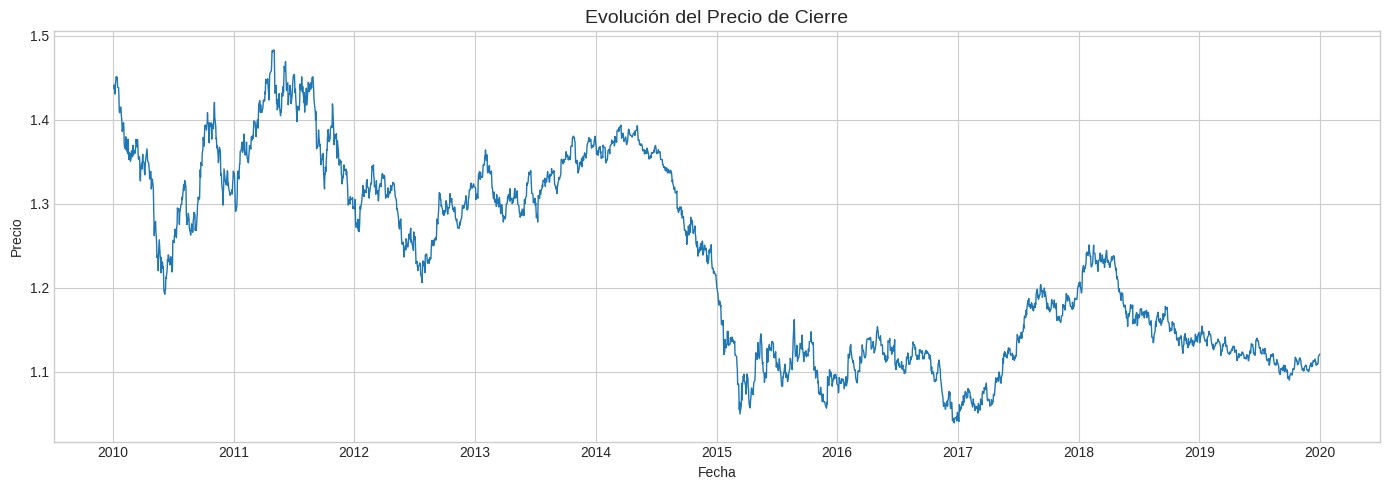

In [ ]:
# ============================================================
# VISUALIZACIÓN DEL PRECIO
# ============================================================

plt.figure(figsize=(14, 5))
plt.plot(df['Close'], linewidth=1)
plt.title('Evolución del Precio de Cierre', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()

---

## 6. Creación de Features: Indicadores Técnicos

### ¿Por qué crear features?

Los datos OHLC en bruto contienen información, pero un modelo de ML necesita **features más elaboradas** que capturen patrones útiles. Los indicadores técnicos resumen información del precio de formas que pueden ser predictivas.

### Estrategia: muchos indicadores × muchos períodos

Vamos a calcular **5 indicadores técnicos** populares, cada uno con **períodos del 2 al 100**. Esto generará un dataset con cientos de features:

| Indicador | Descripción |
|-----------|-------------|
| **RSI** | Relative Strength Index - mide sobrecompra/sobreventa |
| **Stochastic** | Oscilador que compara el cierre con el rango de precios |
| **Williams %R** | Similar al estocástico, mide niveles de sobrecompra/sobreventa |
| **CCI** | Commodity Channel Index - mide desviación del precio respecto a su media |
| **ADX** | Average Directional Index - mide la fuerza de la tendencia |

Usaremos la librería `pandas_ta` que facilita el cálculo de estos indicadores.

In [ ]:
# ============================================================
# INSTALAR E IMPORTAR PANDAS_TA
# ============================================================

# Instalar la librería (solo necesario la primera vez)
!pip install pandas_ta -q

# Importar
import pandas_ta as ta

print("✅ pandas_ta instalado e importado correctamente")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 16.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
✅ pandas_ta instalado e importado correctamente


In [ ]:
# ============================================================
# CALCULAR INDICADORES PARA PERÍODOS DE 2 A 100
# ============================================================

# Definir el rango de períodos
periodo_min = 2
periodo_max = 100

print(f"Calculando indicadores para períodos de {periodo_min} a {periodo_max}...")
print("Esto puede tardar unos segundos...\n")

# Bucle para cada período
for periodo in range(periodo_min, periodo_max + 1):

    # RSI (Relative Strength Index)
    df[f'RSI_{periodo}'] = ta.rsi(df['Close'], length=periodo)

    # Stochastic (usamos el %K)
    stoch = ta.stoch(df['High'], df['Low'], df['Close'], k=periodo, d=3, smooth_k=3)
    if stoch is not None and len(stoch.columns) > 0:
        df[f'STOCH_{periodo}'] = stoch.iloc[:, 0]  # Primera columna (%K)

    # Williams %R
    df[f'WILLR_{periodo}'] = ta.willr(df['High'], df['Low'], df['Close'], length=periodo)

    # CCI (Commodity Channel Index)
    df[f'CCI_{periodo}'] = ta.cci(df['High'], df['Low'], df['Close'], length=periodo)

    # ADX (Average Directional Index)
    adx = ta.adx(df['High'], df['Low'], df['Close'], length=periodo)
    if adx is not None and len(adx.columns) > 0:
        # ADX devuelve varias columnas, tomamos la principal (ADX)
        adx_col = [col for col in adx.columns if col.startswith('ADX_')][0]
        df[f'ADX_{periodo}'] = adx[adx_col]

print(f"✅ Indicadores calculados")
print(f"   Columnas totales en el dataset: {len(df.columns)}")

Calculando indicadores para períodos de 2 a 100...
Esto puede tardar unos segundos...

✅ Indicadores calculados
   Columnas totales en el dataset: 499


In [ ]:
# ============================================================
# VERIFICAR LAS FEATURES CREADAS
# ============================================================

# Contar features por tipo de indicador
indicadores = ['RSI', 'STOCH', 'WILLR', 'CCI', 'ADX']

print("FEATURES CREADAS POR INDICADOR:")
print("=" * 40)
for ind in indicadores:
    cols = [c for c in df.columns if c.startswith(f'{ind}_')]
    print(f"{ind}: {len(cols)} features")

# Total de features (excluyendo OHLCV originales)
cols_originales = ['Open', 'High', 'Low', 'Close', 'Volume']
cols_features = [c for c in df.columns if c not in cols_originales]
print(f"\nTOTAL FEATURES: {len(cols_features)}")

FEATURES CREADAS POR INDICADOR:
RSI: 99 features
STOCH: 99 features
WILLR: 99 features
CCI: 99 features
ADX: 99 features

TOTAL FEATURES: 495


In [ ]:
# Vista del dataset con algunos indicadores
cols_muestra = ['Close', 'RSI_14', 'STOCH_14', 'WILLR_14', 'CCI_14', 'ADX_14']
df[cols_muestra].tail(10)

,Close,RSI_14,STOCH_14,WILLR_14,CCI_14,ADX_14
Date,,,,,,
2019-12-17,1.11499,63.778735,71.230159,-22.756410,-21252.805912,18.927269
2019-12-18,1.11131,55.487206,70.558608,-39.606227,-23262.407926,19.842005
2019-12-19,1.11197,56.577526,65.672376,-40.620234,-26870.267232,20.566649
2019-12-20,1.10747,47.952948,47.204446,-78.160200,-29241.122768,19.846419
2019-12-23,1.10895,50.619111,37.440314,-68.898623,-29646.250890,19.177633
2019-12-24,1.10855,49.875475,27.179808,-71.401752,-29329.578004,18.529783
2019-12-26,1.10961,51.892402,31.643721,-64.768461,-29279.755386,18.338181
2019-12-27,1.11763,63.770678,49.301203,-15.926179,-29571.784332,19.770668
2019-12-30,1.11988,66.285726,68.502631,-13.797468,-28500.923446,21.566157


---

## 7. Creación de Targets

### ⚠️ El problema del Look-Ahead Bias

Este es uno de los errores más graves y comunes en ML aplicado a finanzas. Debemos entenderlo bien:

**Situación:** Estamos al cierre de la vela N. En ese momento:
- ✅ **Conocemos** los valores OHLC de la vela N (ya ha cerrado)
- ✅ **Conocemos** los indicadores calculados hasta la vela N
- ❌ **NO conocemos** nada de la vela N+1 (aún no ha ocurrido)

**El error:** Si usamos como target el precio de cierre de la **misma vela N**, estaríamos usando información que ya conocemos en el momento de la predicción. ¡Eso no es predecir, es hacer trampa!

```
         Vela N-1         Vela N          Vela N+1
        ┌────────┐      ┌────────┐      ┌────────┐
        │        │      │        │      │   ???  │
        │ OHLC   │      │ OHLC   │      │        │
        │        │      │        │      │        │
        └────────┘      └────────┘      └────────┘
                              ▲               ▲
                              │               │
                        Aquí estamos    Esto queremos
                        (conocemos)      predecir
```

**La solución:** Nuestro target debe ser información de la **vela siguiente (N+1)**:
- Para **regresión**: el cambio porcentual entre el cierre de N y el cierre de N+1
- Para **clasificación**: si el cierre de N+1 es mayor o menor que el cierre de N

In [ ]:
# ============================================================
# TARGET PARA REGRESIÓN
# Cambio porcentual entre cierre actual y cierre siguiente
# ============================================================

# shift(-1) desplaza los valores una posición hacia ARRIBA
# Es decir, en cada fila ponemos el valor de la fila SIGUIENTE
cierre_siguiente = df['Close'].shift(-1)

# Calcular el cambio porcentual
df['Target_Return'] = (cierre_siguiente - df['Close']) / df['Close']

print("Target para regresión (cambio % hacia la siguiente vela):")
df[['Close', 'Target_Return']].tail(10)

Target para regresión (cambio % hacia la siguiente vela):


,Close,Target_Return
Date,,
2019-12-17,1.11499,-0.003300
2019-12-18,1.11131,0.000594
2019-12-19,1.11197,-0.004047
2019-12-20,1.10747,0.001336
2019-12-23,1.10895,-0.000361
2019-12-24,1.10855,0.000956
2019-12-26,1.10961,0.007228
2019-12-27,1.11763,0.002013
2019-12-30,1.11988,0.000848


In [ ]:
# ============================================================
# TARGET PARA CLASIFICACIÓN
# ¿Sube o baja en la siguiente vela?
# ============================================================

# 1 si el cierre siguiente es MAYOR que el cierre actual (sube)
# 0 si el cierre siguiente es MENOR o IGUAL que el cierre actual (baja/igual)
df['Target_Direccion'] = (df['Close'].shift(-1) > df['Close']).astype(int)

print("Target para clasificación (1=sube, 0=baja):")
df[['Close', 'Target_Return', 'Target_Direccion']].tail(10)

Target para clasificación (1=sube, 0=baja):


,Close,Target_Return,Target_Direccion
Date,,,
2019-12-17,1.11499,-0.003300,0
2019-12-18,1.11131,0.000594,1
2019-12-19,1.11197,-0.004047,0
2019-12-20,1.10747,0.001336,1
2019-12-23,1.10895,-0.000361,0
2019-12-24,1.10855,0.000956,1
2019-12-26,1.10961,0.007228,1
2019-12-27,1.11763,0.002013,1
2019-12-30,1.11988,0.000848,1


### Verificación: ¿Por qué la última fila tiene NaN?

La última fila del dataset tiene `NaN` en los targets porque **no existe una vela siguiente** de la que obtener el cierre. Esto es correcto:
- En la última vela conocida, no podemos calcular el target porque no sabemos qué pasará después
- Esta fila se eliminará al limpiar el dataset

In [ ]:
# ============================================================
# DISTRIBUCIÓN DEL TARGET DE CLASIFICACIÓN
# ============================================================

# Contar cuántas veces sube vs baja (excluyendo NaN)
conteo = df['Target_Direccion'].value_counts().sort_index()
total = conteo.sum()

print("DISTRIBUCIÓN DEL TARGET:")
print("=" * 40)
print(f"Baja (0): {conteo.get(0, 0):,} velas ({100*conteo.get(0, 0)/total:.1f}%)")
print(f"Sube (1): {conteo.get(1, 0):,} velas ({100*conteo.get(1, 0)/total:.1f}%)")

DISTRIBUCIÓN DEL TARGET:
Baja (0): 1,298 velas (50.0%)
Sube (1): 1,296 velas (50.0%)


---

## 8. Dataset Final

### Limpieza de valores nulos

Los indicadores técnicos generan valores nulos (NaN) en las primeras filas porque necesitan un histórico mínimo para calcularse. También tenemos un NaN en la última fila por el shift del target.

In [ ]:
# ============================================================
# REVISAR VALORES NULOS
# ============================================================

# Contar nulos por columna (mostrar solo las que tienen nulos)
nulos = df.isnull().sum()
nulos_con_valores = nulos[nulos > 0]

print(f"Columnas con valores nulos: {len(nulos_con_valores)}")
print(f"\nEjemplos (primeras 10 columnas con nulos):")
print(nulos_con_valores.head(10))
print(f"\nTotal de filas: {len(df)}")

Columnas con valores nulos: 496

Ejemplos (primeras 10 columnas con nulos):
RSI_2      1
STOCH_2    3
WILLR_2    1
CCI_2      1
ADX_2      1
RSI_3      1
STOCH_3    4
WILLR_3    2
CCI_3      2
ADX_3      2
dtype: int64

Total de filas: 2594


In [ ]:
# ============================================================
# ELIMINAR FILAS CON VALORES NULOS E INFINITOS
# ============================================================

# Guardar tamaño original
filas_originales = len(df)

# Primero: reemplazar infinitos por NaN
# (algunos indicadores pueden generar infinitos por divisiones)
df = df.replace([np.inf, -np.inf], np.nan)

# Segundo: eliminar filas con cualquier valor nulo
df_clean = df.dropna()

# Mostrar resultado
filas_finales = len(df_clean)
print(f"Filas originales: {filas_originales:,}")
print(f"Filas eliminadas: {filas_originales - filas_finales:,}")
print(f"Filas finales:    {filas_finales:,}")
print(f"\nPeríodo del dataset limpio: {df_clean.index.min().date()} a {df_clean.index.max().date()}")

Filas originales: 2,594
Filas eliminadas: 105
Filas finales:    2,489

Período del dataset limpio: 2010-05-25 a 2019-12-30


In [ ]:
# ============================================================
# RESUMEN DEL DATASET FINAL
# ============================================================

# Separar columnas por tipo
cols_ohlcv = ['Open', 'High', 'Low', 'Close', 'Volume']
cols_targets = ['Target_Return', 'Target_Direccion']
cols_features = [c for c in df_clean.columns if c not in cols_ohlcv + cols_targets]

print("DATASET FINAL - RESUMEN")
print("=" * 50)
print(f"\nObservaciones (velas): {len(df_clean):,}")
print(f"\nColumnas totales: {len(df_clean.columns)}")
print(f"  - OHLCV originales: {len(cols_ohlcv)}")
print(f"  - Features (indicadores): {len(cols_features)}")
print(f"  - Targets: {len(cols_targets)}")

print(f"\nFEATURES por indicador:")
for ind in ['RSI', 'STOCH', 'WILLR', 'CCI', 'ADX']:
    n = len([c for c in cols_features if c.startswith(f'{ind}_')])
    print(f"  - {ind}: {n} features (períodos 2-100)")

print(f"\nTARGETS:")
print(f"  - Target_Return: para problemas de REGRESIÓN")
print(f"  - Target_Direccion: para problemas de CLASIFICACIÓN")

DATASET FINAL - RESUMEN

Observaciones (velas): 2,489

Columnas totales: 501
  - OHLCV originales: 5
  - Features (indicadores): 495
  - Targets: 2

FEATURES por indicador:
  - RSI: 99 features (períodos 2-100)
  - STOCH: 99 features (períodos 2-100)
  - WILLR: 99 features (períodos 2-100)
  - CCI: 99 features (períodos 2-100)
  - ADX: 99 features (períodos 2-100)

TARGETS:
  - Target_Return: para problemas de REGRESIÓN
  - Target_Direccion: para problemas de CLASIFICACIÓN


In [ ]:
# Vista del dataset final (algunas columnas)
cols_vista = ['Close', 'RSI_14', 'STOCH_14', 'CCI_14', 'ADX_14', 'Target_Return', 'Target_Direccion']
df_clean[cols_vista].head(10)

,Close,RSI_14,STOCH_14,CCI_14,ADX_14,Target_Return,Target_Direccion
Date,,,,,,,
2010-05-25,1.23423,33.800311,28.255959,-5323.085240,37.259631,-0.013466,0
2010-05-26,1.21761,30.094866,16.155549,-5130.491237,37.504451,0.015128,1
2010-05-27,1.23603,38.183371,15.807777,-5465.590374,37.782630,-0.007330,0
2010-05-28,1.22697,35.978298,15.239397,-6812.076021,37.567649,0.002812,1
2010-05-31,1.23042,37.459405,23.085315,-7775.426521,37.386534,-0.006250,0
2010-06-01,1.22273,35.488616,22.360737,-9055.499514,37.782521,0.001652,1
2010-06-02,1.22475,36.434655,24.192652,-10842.775243,38.150224,-0.007038,0
2010-06-03,1.21613,34.134252,18.339552,-11280.458082,37.990328,-0.016248,0
2010-06-04,1.19637,29.531302,11.896897,-9656.282760,38.572094,-0.003544,0


### Descargar el dataset para futuras sesiones

Descargamos el dataset limpio a nuestro ordenador para poder subirlo en las próximas sesiones.

In [ ]:
# ============================================================
# DESCARGAR DATASET LIMPIO
# ============================================================

# Guardar y descargar a tu ordenador
from google.colab import files

# Guardar el CSV
df_clean.to_csv('dataset_ml_financiero.csv')

# Descargar automáticamente
files.download('dataset_ml_financiero.csv')

print(f"✅ Dataset descargado: {len(df_clean):,} filas × {len(df_clean.columns)} columnas")

---

## Resumen de la Sesión

En esta primera sesión hemos:

✅ Entendido **qué es Machine Learning** y cómo se diferencia de la programación tradicional

✅ Aprendido la **taxonomía básica**: supervisado vs no supervisado, regresión vs clasificación

✅ Definido el **vocabulario esencial**: features, target, observación, entrenamiento

✅ Cargado y explorado un **dataset financiero** con datos OHLC

✅ Creado **cientos de features** usando indicadores técnicos (RSI, Stochastic, Williams %R, CCI, ADX) con períodos de 2 a 100

✅ Entendido el problema del **look-ahead bias** y cómo evitarlo

✅ Creado **targets** correctos para regresión (cambio % siguiente vela) y clasificación (dirección siguiente vela)

### Próxima sesión

En la **Sesión 2 (8 de enero)** veremos nuestro primer algoritmo de ML: **K-Means** para clustering. Usaremos el dataset que hemos creado hoy para agrupar velas según sus características.